# Classification & Regression Models

In [268]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [269]:
import pandas as pd
import numpy as np

In [270]:
import seaborn as sns

In [344]:
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import datasets
from sklearn.linear_model import LinearRegression

## Classification

In [272]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

In [273]:
iris_data.shape
iris_data.head()

(150, 5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [274]:
iris_data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [275]:
iris_data.info()
iris_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [276]:
iris_data.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

<Axes: xlabel='variety', ylabel='count'>

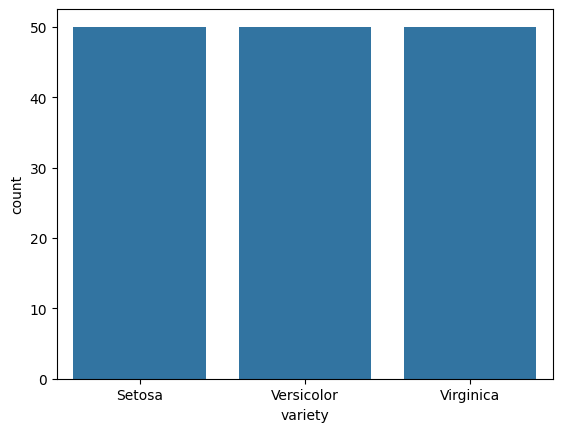

In [277]:
sns.countplot(data=iris_data, x="variety")

In [278]:
train, test = model_selection.train_test_split(iris_data, test_size=0.2)

train.shape
test.shape

(120, 5)

(30, 5)

In [279]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [280]:
feats = iris_data.drop("variety", axis=1)
feats.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [281]:
variance = VarianceThreshold()
variance.fit_transform(feats);

In [282]:
[feat for feat in zip(feats.columns, variance.variances_)]

[('sepal.length', 0.6811222222222223),
 ('sepal.width', 0.1887128888888889),
 ('petal.length', 3.0955026666666665),
 ('petal.width', 0.5771328888888888)]

<Axes: xlabel='Features', ylabel='Variance'>

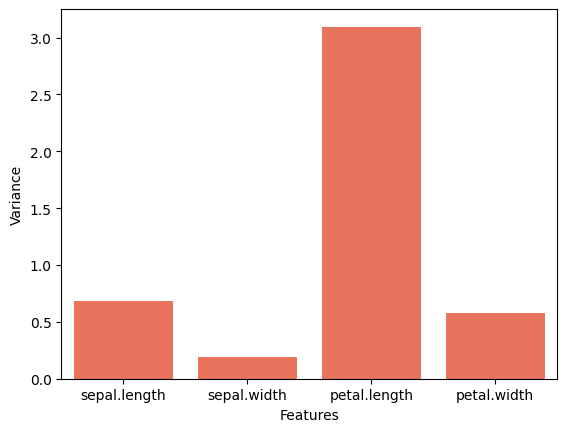

In [283]:
_data = {
    "Features": feats.columns,
    "Variance": variance.variances_,
}

sns.barplot(data=_data, x="Features", y="Variance", color="tomato", )

In [284]:
selector = VarianceThreshold(threshold=0.2) # Feats with variance under 0.2 will be removed
selected_feats = selector.fit_transform(feats)
f"Before = {feats.shape[1]}", f"After = {selected_feats.shape[1]}"

('Before = 4', 'After = 3')

In [285]:
# Split into input and target 
feats_collumns = ['sepal.length', 'petal.length', 'petal.width']
target_collumns = ['variety']

train_feats = train[feats_collumns]
train_target = train[target_collumns]

test_feats = test[feats_collumns]
test_target = test[target_collumns]

In [286]:
# Dession tree model
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_feats, train_target);

In [288]:
predictions = pd.DataFrame({
    "Predictions": dt.predict(test_feats)
})

results = pd.concat([predictions, test_target], axis=1)
results

,Predictions,variety
0,Virginica,Versicolor
1,Versicolor,Versicolor
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Versicolor,Versicolor
5,Setosa,Setosa
6,Setosa,Setosa
7,Virginica,Virginica
8,Setosa,Setosa
9,Versicolor,Versicolor


In [289]:
# model evaluation

# Accurarcy
accuracy_score(test_target, predictions) * 100

93.33333333333333

In [290]:
cm = pd.DataFrame(
    confusion_matrix(test_target, predictions),
    index = ["Setosa", "Versicolor", "Virginica"],
    columns = ["Setosa", "Versicolor", "Virginica"]
)

cm

,Setosa,Versicolor,Virginica
Setosa,9,0,0
Versicolor,0,10,1
Virginica,0,1,9


<Axes: >

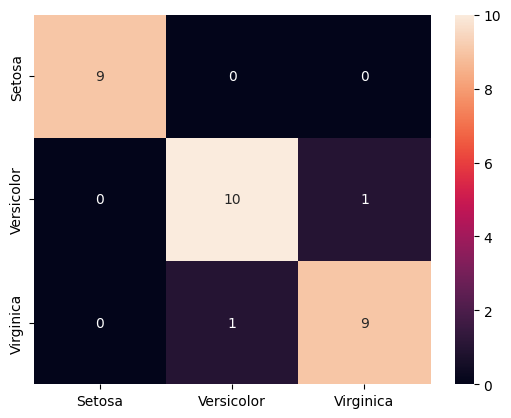

In [291]:
sns.heatmap(cm, annot=True)

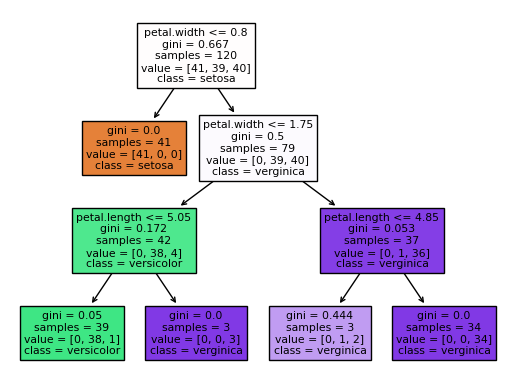

In [292]:
tree.plot_tree(dt, feature_names=feats_collumns, class_names=['setosa', 'versicolor', 'verginica'], filled=True);

## Regresion

In [327]:
data = pd.read_csv("../data/california-housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [329]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [330]:
data.dropna(inplace=True)
data.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [331]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [332]:
data["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [333]:
data = pd.get_dummies(data, columns=["ocean_proximity"])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 10  ocean_proximity_INLAND      20433 non-null  bool   
 11  ocean_proximity_ISLAND      20433 non-null  bool   
 12  ocean_proximity_NEAR BAY    20433 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  20433 no

In [335]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

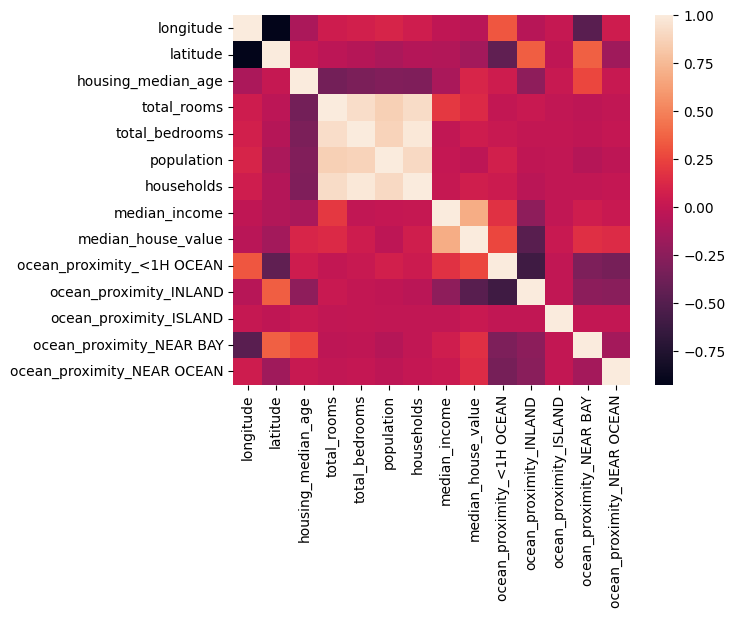

In [336]:
corr_matrix = data.corr()
sns.heatmap(data=corr_matrix, annot=False)

In [337]:
target = ["median_house_value"]

corr_matrix['median_house_value'].sort_values(ascending=False)

print("Top four")
feats = abs(corr_matrix['median_house_value']).sort_values(ascending=False)[1:5].index
feats = list(feats)
feats


median_house_value            1.000000
median_income                 0.688355
ocean_proximity_<1H OCEAN     0.257614
ocean_proximity_NEAR BAY      0.160526
ocean_proximity_NEAR OCEAN    0.140378
total_rooms                   0.133294
housing_median_age            0.106432
households                    0.064894
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023525
population                   -0.025300
longitude                    -0.045398
latitude                     -0.144638
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

Top four


['median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_NEAR BAY']

In [338]:
train, test = model_selection.train_test_split(data, test_size=0.2, random_state=0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

data.shape[0], train.shape[0], test.shape[0]

(20433, 16346, 4087)

In [339]:
# feats = data.drop("median_house_value", axis=1).columns
feats

['median_income',
 'ocean_proximity_INLAND',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_NEAR BAY']

In [340]:
train_feats = train[feats]
train_target = train[target]

test_feats = test[feats]
test_target = test[target]

In [341]:
lr = LinearRegression()
lr.fit(train_feats, train_target);

In [342]:
predictions = pd.DataFrame({
    "Predictions": lr.predict(test_feats).flatten()
})

results = pd.concat([predictions, test_target], axis=1)
results

,Predictions,median_house_value
0,206574.132356,98900.0
1,214187.347082,153000.0
2,150147.821263,91300.0
3,368854.167554,345200.0
4,322530.141895,344100.0
...,...,...
4082,104590.738475,76300.0
4083,246017.952059,261600.0
4084,173152.711751,127000.0
4085,200879.115692,158600.0


In [343]:
lr.score(test_feats, test_target)

0.5945243847196786

In [346]:
mean_absolute_error(results["median_house_value"], results["Predictions"])
mean_squared_error(results["median_house_value"], results["Predictions"])


53311.19882856622

5429191181.904243